Bu projede, eBay'in Almanya-Kleinanzeigen'de kullanılan arabalar ile ilgili bir veri seti kullanacağız. Veri setinde 50000 adet veri olduğu bilinmektedir.

In [76]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
#Gerekli kütüphaneleri ve veri setini import ederek başlayalım.

df = pd.read_csv('/content/drive/MyDrive/autos.csv', encoding = 'Latin-1')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [77]:
df.info()
#Toplam 20 adet sütun bulunmaktadır.
#Bazı sütunlarda boş/eksik veriler vardır.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [78]:
df.describe(include = 'all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


- nrOfPictures sütununa gerek yoktur. Çünkü veri seti fotoğraf içermemektedir.
- yearOfRegistration sütununda min ve max değerleri 1000 ve 9999'dur. Bu kayıtların silinmesi gerekmektedir.
- powerPS sütunundaki max değerlerde sorunlu görünmektedir.
- monthOfRegistration min değer 0'dır. Düzeltilmelidir.
- seller ve offerType sütunları gereksizdir. Silinmelidir.

In [79]:
df = df.drop(["nrOfPictures", "seller", "offerType"], axis=1)

In [80]:
df['price'].head()
# '$' ve ',' ifadeleri kaldırılıp string tipi int tipine dönüştürülür.

0    $5,000
1    $8,500
2    $8,990
3    $4,350
4    $1,350
Name: price, dtype: object

In [81]:
def convert_price(column):
    if pd.isnull(column) == True:
        return None
    else:
        string = column.split(' ')[0]
        string = string.replace('$','')
        string = string.replace(',','')
        return int(string)
    
price = df['price'].apply(convert_price)
df['price'] = price
df['price'].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int64

In [82]:
df['odometer'].head()
#price değerinde olduğu gibi 'km' ve ',' silinir. String tipi int tipine dönüştürülür.

0    150,000km
1    150,000km
2     70,000km
3     70,000km
4    150,000km
Name: odometer, dtype: object

In [83]:
def convert_odometer(column):
    if pd.isnull(column) == True:
        return None
    else:
        string = column.split(' ')[0]
        string = string.replace(',','')
        string = string.replace('km','')
        return int(string)
    
odometer = df['odometer'].apply(convert_odometer)
df['odometer'] = odometer
df['odometer'].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer, dtype: int64

In [84]:
df = df.rename(columns = {'odometer':'odometerKm'})

In [85]:
df['odometerKm'].value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometerKm, dtype: int64

- odometer_km'nin 13 adet unique değeri bulunmaktadır.
- Değerler incelendiğinde gerçekçi olan bir değer olduğu görülmemektedir.

In [86]:
df['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [87]:
df['price'].value_counts().head(15)
# fiyatı 0$ olan 1421 araba olduğu görülmektedir. Bu pek olası değildir. 
#describe'da gördüğümüz gibi max değer de 100000000$'dır. Max fiyat aralığının üstünde gibi görünmektedir.

0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
999      434
750      433
900      420
650      419
850      410
Name: price, dtype: int64

In [88]:
df['price'].value_counts().sort_index(ascending = False).head(20)
#350000'in üzerindeki fiyatlarda büyük bir sıçrama vardır. Bunların temizlenmesi gerekmektedir.

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

In [89]:
df['price'].value_counts().sort_index(ascending = True).head()
# Fiyat 0 olamaz. 0 olanlar silinmelidir.

0    1421
1     156
2       3
3       1
5       2
Name: price, dtype: int64

In [90]:
df = df[df['price'].between(1, 350000)]
#silme işlemi

In [91]:
df['price'].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

5 adet kolon tarih verileri içermektedir. Bunlar; dateCrawled, yearOfRegistration, monthOfRegistration, dateCreated, lastSeen' dir.



In [92]:
df[['dateCrawled','dateCreated','lastSeen', 'yearOfRegistration', 'monthOfRegistration']][0:10]

,dateCrawled,dateCreated,lastSeen,yearOfRegistration,monthOfRegistration
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54,2004,3
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08,1997,6
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37,2009,7
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28,2007,6
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50,2003,7
5,2016-03-21 13:47:45,2016-03-21 00:00:00,2016-04-06 09:45:21,2006,4
6,2016-03-20 17:55:21,2016-03-20 00:00:00,2016-03-23 02:48:59,1995,8
7,2016-03-16 18:55:19,2016-03-16 00:00:00,2016-04-07 03:17:32,1998,12
8,2016-03-22 16:51:34,2016-03-22 00:00:00,2016-03-26 18:18:10,2000,10
9,2016-03-16 13:47:02,2016-03-16 00:00:00,2016-04-06 10:46:35,1997,7


In [93]:
# Veriyi günlük bazda daha sade inceleyebilmek için saat kısmını görmezden gelindi. 
dC= (df['dateCrawled'].str[:10].value_counts(normalize = True, dropna = False).sort_index())
dC

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: dateCrawled, dtype: float64

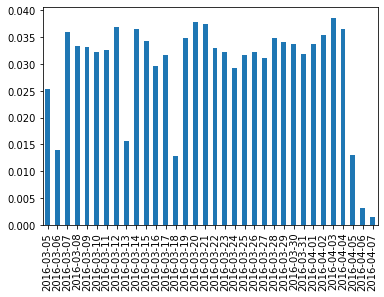

In [94]:
dC.plot(kind= "bar")

Günlük şekilde incelendiğinde verilerin uniform dağıldığını görebiliriz.

In [95]:
# Veriyi daha sade inceleyebilmek için saat kısmını görmezden gelindi.
daC = df['dateCreated'].str[:10].value_counts(normalize = True, dropna = False).sort_index()
daC

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: dateCreated, Length: 76, dtype: float64

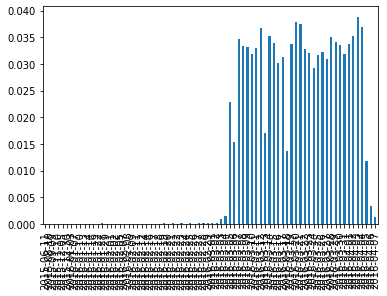

In [96]:
daC.plot(kind= "bar")

In [97]:
# Veriyi daha sade inceleyebilmek için saat kısmını görmezden gelindi.
lS = df['lastSeen'].str[:10].value_counts(normalize = True, dropna = False).sort_index()
lS

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: lastSeen, dtype: float64

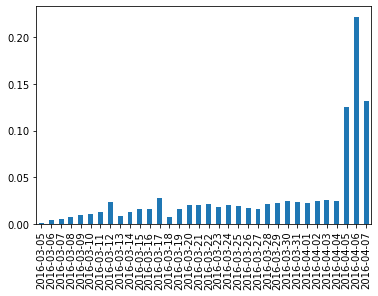

In [98]:
lS.plot(kind= "bar")

'lastSeen' kolonunun son 3 gününde büyük bir artış görülmektedir. Satışlardan daha çok reklam vb. durumlardan kaynaklandığı düşünülmektedir. Çünkü önceki günler birbirlerine çok yakın değerlerdir.

'yearOfRegistration' sütununda min. 1000 ve max. 9999 değerleri vardır. Bunlar hatalıdır. Benzer hatalı değerler olabileceğinden sadece 1900 ve 2022 yılları arasındaki değerlerin alınması doğru olacaktır.

In [99]:
(df['yearOfRegistration'].between(1900,2022)).sum() / df.shape[0]

0.9995881807886338

In [100]:
df = df[df['yearOfRegistration'].between(1900, 2022)]
df['yearOfRegistration'].value_counts(normalize = True).head(20)

2000    0.065012
2005    0.060480
1999    0.059677
2004    0.055680
2003    0.055598
2006    0.055001
2001    0.054300
2002    0.051210
1998    0.048676
2007    0.046905
2008    0.045628
2009    0.042950
1997    0.040190
2011    0.033433
2010    0.032733
2017    0.028674
1996    0.028283
2012    0.026985
1995    0.025276
2016    0.025131
Name: yearOfRegistration, dtype: float64

Verilerin son 30 yıla ait olduğu söylenebilir. Min.1995 max.2017

In [101]:
df['brand'].value_counts()

volkswagen        10331
opel               5274
bmw                5274
mercedes_benz      4650
audi               4168
ford               3382
renault            2325
peugeot            1430
fiat               1262
seat                919
skoda               780
nissan              741
mazda               739
smart               694
citroen             685
toyota              611
hyundai             483
sonstige_autos      468
volvo               439
mini                418
mitsubishi          397
honda               388
kia                 345
alfa_romeo          321
porsche             287
suzuki              286
chevrolet           275
chrysler            169
dacia               129
daihatsu            122
jeep                107
subaru              102
land_rover           99
saab                 79
daewoo               76
jaguar               74
trabant              67
rover                65
lancia               55
lada                 29
Name: brand, dtype: int64

Volkswagen en popüler otomobildir. 2. ve 3. sıradakilerin 2 katı kadar daha popülerdir.

string değerler Almanca olduğundan bunları İngilizceye çevirmek gerekmektedir.

In [102]:
df['gearbox'].value_counts()

manuell      36097
automatik    10117
Name: gearbox, dtype: int64

In [103]:
df['notRepairedDamage'].value_counts()

nein    34771
ja       4689
Name: notRepairedDamage, dtype: int64

In [104]:
df['fuelType'].value_counts()

benzin     29363
diesel     14352
lpg          668
cng           73
hybrid        37
elektro       19
andere        17
Name: fuelType, dtype: int64

In [105]:
df['vehicleType'].value_counts()

limousine     12598
kleinwagen    10585
kombi          8931
bus            4031
cabrio         3016
coupe          2463
suv            1965
andere          390
Name: vehicleType, dtype: int64

In [106]:
gearbox = {'manuell': 'manual', 'automatik': 'automatic'}

notRepairedDamage = {'nein': 'no','ja': 'yes'}

df['gearbox'] = df['gearbox'].map(gearbox)
df['notRepairedDamage'] = df['notRepairedDamage'].map(notRepairedDamage)
df['fuelType'] = df['fuelType'].replace(['benzin', 'elektro', 'andere'], ['gasoline', 'electric', 'other'])
df['vehicleType'] = df['vehicleType'].replace(['limousine', 'kleinwagen', 'kombi', 'cabrio', 'andere'], ['sedan', 'small car', 'stationwagen', 'convertible', 'other'])
df['model'] = df['model'].replace('andere', 'other')
df['name'] = df['name'].str.replace("_"," ") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [107]:
df.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometerKm,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manual,158,other,150000,3,lpg,peugeot,no,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,sedan,1997,automatic,286,7er,150000,6,gasoline,bmw,no,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,sedan,2009,manual,102,golf,70000,7,gasoline,volkswagen,no,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,small car,2007,automatic,71,fortwo,70000,6,gasoline,smart,no,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,stationwagen,2003,manual,0,focus,150000,7,gasoline,ford,no,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


In [108]:
df['name'] = df['name'].str.replace("_"," ")
df

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometerKm,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot 807 160 NAVTECH ON BOARD,5000,control,bus,2004,manual,158,other,150000,3,lpg,peugeot,no,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW 740i 4 4 Liter HAMANN UMBAU Mega Optik,8500,control,sedan,1997,automatic,286,7er,150000,6,gasoline,bmw,no,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen Golf 1.6 United,8990,test,sedan,2009,manual,102,golf,70000,7,gasoline,volkswagen,no,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart smart fortwo coupe softouch/F1/Klima/Pan...,4350,control,small car,2007,automatic,71,fortwo,70000,6,gasoline,smart,no,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford Focus 1 6 Benzin TÜV neu ist sehr gepfleg...,1350,test,stationwagen,2003,manual,0,focus,150000,7,gasoline,ford,no,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi Q5 3.0 TDI qu. S tr. Navi Panorama Xenon,24900,control,sedan,2011,automatic,239,q5,100000,1,diesel,audi,no,2016-03-27 00:00:00,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel Astra F Cabrio Bertone Edition TÜV neu+...,1980,control,convertible,1996,manual,75,astra,150000,5,gasoline,opel,no,2016-03-28 00:00:00,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat 500 C 1.2 Dualogic Lounge,13200,test,convertible,2014,automatic,69,500,5000,11,gasoline,fiat,no,2016-04-02 00:00:00,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi A3 2.0 TDI Sportback Ambition,22900,control,stationwagen,2013,manual,150,a3,40000,11,diesel,audi,no,2016-03-08 00:00:00,35683,2016-04-05 16:45:07


In [110]:
nRD = df['notRepairedDamage'].value_counts()
nRD

no     34771
yes     4689
Name: notRepairedDamage, dtype: int64

Daha önce hasar görmüş arabaların, listeye alınmadan önce hasar görmemiş olanlardan çok daha ucuz olduğunu görülebilmektedir.

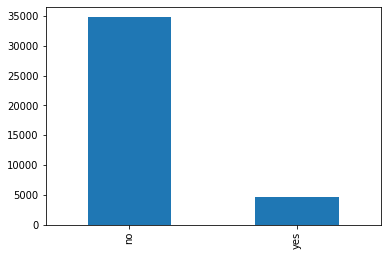

In [111]:
nRD.plot(kind= "bar")

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48545 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          48545 non-null  object
 1   name                 48545 non-null  object
 2   price                48545 non-null  int64 
 3   abtest               48545 non-null  object
 4   vehicleType          43979 non-null  object
 5   yearOfRegistration   48545 non-null  int64 
 6   gearbox              46214 non-null  object
 7   powerPS              48545 non-null  int64 
 8   model                46094 non-null  object
 9   odometerKm           48545 non-null  int64 
 10  monthOfRegistration  48545 non-null  int64 
 11  fuelType             44529 non-null  object
 12  brand                48545 non-null  object
 13  notRepairedDamage    39460 non-null  object
 14  dateCreated          48545 non-null  object
 15  postalCode           48545 non-null  int64 
 16  last